<h1>HW3</h1>

# Question 1
### (Bayes Theorem) Read the following example and complete the exercises 

Trolls Under the Bridge
1. Trolls(T) are bad
2. Gnomes(G) are benign
3. Every bridge has 5 creatures under it

Below are the probabilities of what creatures live under a bridge:
1. TTGGG: 20% (E1)
2. TGGGG: 20% (E2)
3. GGGGG: 60% (E3)

A knight is approaching a bridge and he wants to know his chance of crossing the bridge safely.

### 1.1 

#### What is the chance of the knight crossing the bridge safely?


In [ ]:
He has a chance of crossing safely 60% of the time.

### 1.2

#### Before crossing a bridge, a knight captures a troll. “I now have an 80% chance of crossing safely,” he reasons, “since only the case 20% had TTGGG (E1) now have TGGG is still a threat.”

#### Do you agree with him? Why?

No, his reasoning is incorrect. There are 3 instances where the knight can capture a troll and in only one of these three instances where he will make it across safely as in two scnarios, there will still be a troll remainig even if he captures one. 

### 1.3

#### Now he wants to use Bayes' theorem to calculate his chance of crossing safely given a troll captured 

\begin{equation*}
P(A|B) = \frac{P(B|A)P(A)}{P(B)} \\
P(A|B): Posteior \\
P(B|A): Likelihood \\
P(A): Prior \\
P(B): Marginal Probability \\
\end{equation*}
    
#### Given the three events, E1, E2, and E3, under which two events the knight cannot cross safely after a troll was captured?

If the knight captures either of the trolls in E1, there is still a troll left to attack him, preventing him from crossing safely.

### 1.4

#### Use Bayes' theorem to calculate the probability of the two events in 1.3 (separately) given the troll was captured. 

Probability of one event given a troll captured: 

In [ ]:
P(B) = Troll Captured
P(A) = E1 Occurs
P(A|B) = E1 occurs given troll captured
P(B|A) = Troll captured given E1 occur = 2/5


In [3]:
likelihood = (2/5)
prior = (1/5)
marginal_probability = ((2/5)*.2)+((1/5)*.2)+((0/5)*0.6)

posterior = (likelihood*prior)/marginal_probability

0.6666666666666666

Probability of the other event given a troll captured: 

In [ ]:
P(B) = Troll Captured
P(A) = E2 Occurs
P(A|B) = E2 occurs given troll captured
P(B|A) = Troll captured given E1 occur = 1/5


In [4]:
likelihood = (1/5)
prior = (1/5)
marginal_probability = ((2/5)*.2)+((1/5)*.2)+((0/5)*0.6)

posterior = (likelihood*prior)/marginal_probability

0.3333333333333333

### 1.5

#### What is the chance of the knight crossing safely?

In [ ]:
1/3

#### Now looking back to 1.1, the probabilities were changed after assimilating data! 

# Question 2
### (Polynomial Fitting) Read the following example and complete the exercises 

Biological data always comes with errors that influence the intepretation of the data significantly. In this question, we will simulate data and see how noises affect the parameter estimation.

In [1]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random"])

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Polynomials ─ v3.2.4
    Updating `~/.julia/environments/v1.8/Project.toml`
  [f27b6e38] + Polynomials v3.2.4
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [f27b6e38] + Polynomials v3.2.4
Precompiling project...
  ✓ Polynomials
  1 dependency successfully precompiled in 10 seconds. 169 already precompiled.


In [2]:
import Distributions as di
import Plots
import Polynomials
import Random

### 2.1

1. Generate the independent variable x ranging from -10 to 10 with an increment of 1
2. Generate the dependent variable y_true using the equation y_true = x^2 + 3x - 2


In [8]:
x = -10:1:10
y_true = (x.^2) .+ (3 .* x) .- 2

21-element Vector{Int64}:
  68
  52
  38
  26
  16
   8
   2
  -2
  -4
  -4
  -2
   2
   8
  16
  26
  38
  52
  68
  86
 106
 128

### 2.2

1. Generate the Guassian noises with zero mean and a standard deviation of 10

2. Add the noises to y_true to obtain y_observed


In [29]:
using Random, Distributions, Statistics
d = Normal(0,10)
gaussian = rand(d,21)
y_observed = y_true .+ gaussian

21-element Vector{Float64}:
  62.65788813000223
  60.99019669770811
  36.72410722431202
  32.98756089531801
  18.872546771346244
  15.855923423990756
  24.119910752514947
   5.156394206775818
  -7.494937017947392
   7.865984235112636
  16.967929550592086
   2.283927772504608
  -1.6842451393988114
   2.796039056225556
  14.823714223565736
  53.45899643500112
  56.54249443053413
  46.50122423476037
  94.55302746638058
 107.94807629809495
 126.12288407967301

In [9]:
length(x)

21

### 2.3

#### Fit the data (x, y_observed) with a second order polynomial. 

1. Make a scatter plot of y_observed along x
2. Plot a line of y_true along x on the scatter plot
3. Plot a line of the fitted polynomial along x on the same plot

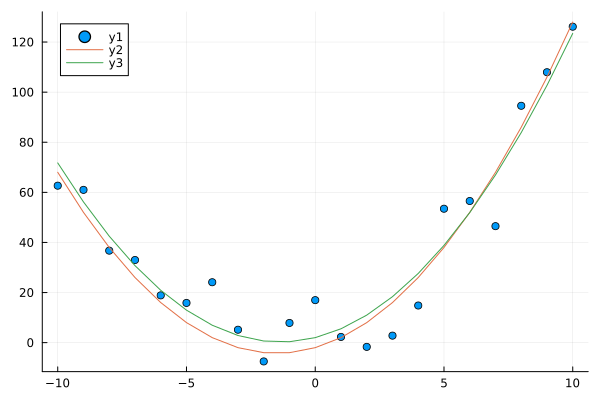

In [30]:
using Plots

scatter(x, y_observed)
plot!(x, y_true)
line_fit = Polynomials.fit(x,y_observed,2)
y_fit = line_fit.(x)
plot!(x, y_fit)

### 2.4

1. Repeat 2.2 and 2.3 with a noise with a standard deviation of 50

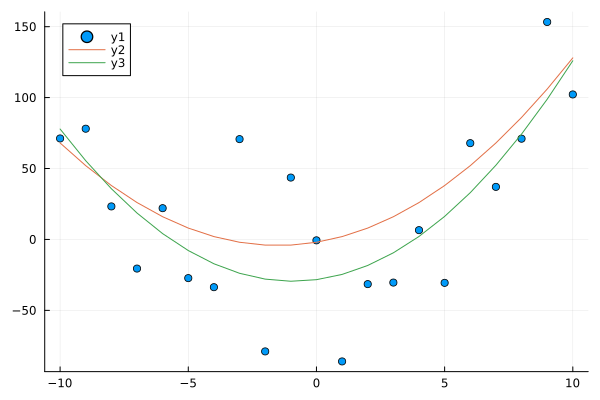

In [31]:

d = Normal(0,50)
gaussian = rand(d,21)
y_observed = y_true .+ gaussian

scatter(x, y_observed)
plot!(x, y_true)
line_fit = Polynomials.fit(x,y_observed,2)
y_fit = line_fit.(x)
plot!(x, y_fit)

2. Compare the plot with the plot in 2.3. Is the fit closer to y_true or not, and why?

The fit is not closer to y_true since the standard deviation is bigger, which is considered the noise. The bigger the noise the less closer to y_true.

### 2.5

#### Repeat 2.2 and 2.3 with a tenth order polynomial fit


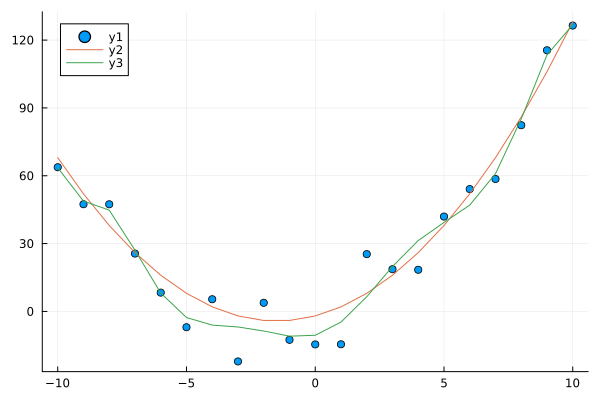

In [32]:
d = Normal(0,10)
gaussian = rand(d,21)
y_observed = y_true .+ gaussian

scatter(x, y_observed)
plot!(x, y_true)
line_fit = Polynomials.fit(x,y_observed,10)
y_fit = line_fit.(x)
plot!(x, y_fit)

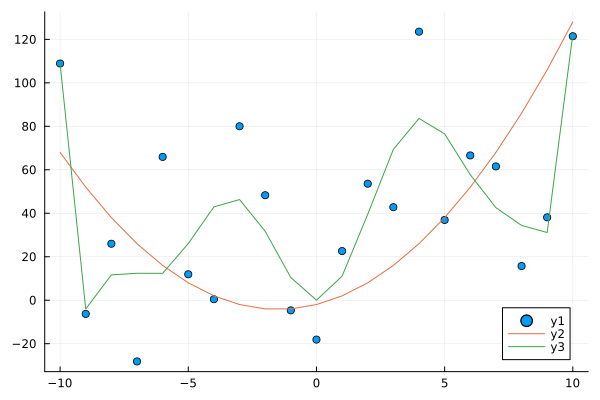

In [33]:
d = Normal(0,50)
gaussian = rand(d,21)
y_observed = y_true .+ gaussian

scatter(x, y_observed)
plot!(x, y_true)
line_fit = Polynomials.fit(x,y_observed,10)
y_fit = line_fit.(x)
plot!(x, y_fit)

### 2.6

1. Create a new independent parameter x_fit ranging from -11 to 11 with an increment of 0.1
2. Plot the same three plots as in 2.3 again but apply the tenth order polynomial to x_fit instead of x


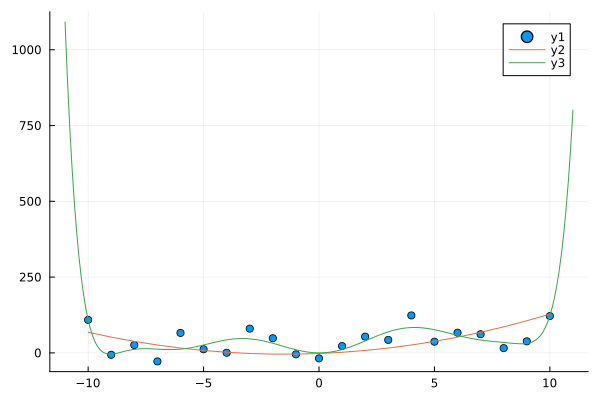

In [34]:
x_fit = -11:0.1:11
scatter(x, y_observed)
plot!(x, y_true)
line_fit = Polynomials.fit(x,y_observed,10)
y_fit = line_fit.(x_fit)
plot!(x_fit, y_fit)

3. What do you observe in the plot? What is this phenomenon called?

This is overfitting where the fitted line tries to stick every parameter that is given. This occurs when there are too many parameters to meet. 